In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation

In [41]:
df = pd.read_csv('data\dataset.csv', index_col=0)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10320 entries, 0 to 10319
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  10320 non-null  object
 1   value      10320 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 241.9+ KB


In [43]:
df.head()

,timestamp,value
0,2014-07-01 00:00:00,10844
1,2014-07-01 00:30:00,8127
2,2014-07-01 01:00:00,6210
3,2014-07-01 01:30:00,4656
4,2014-07-01 02:00:00,3820


In [44]:
# Converting to a datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [45]:
# Setting a datetime index to the dataframe
df = df.set_index('timestamp')

In [46]:
df.head()

,value
timestamp,
2014-07-01 00:00:00,10844
2014-07-01 00:30:00,8127
2014-07-01 01:00:00,6210
2014-07-01 01:30:00,4656
2014-07-01 02:00:00,3820


In [47]:
# Checking NULL values
df.isna().sum()

value    0
dtype: int64

No null values present in our data 

## The Big Five Events

### a. New York City Marathon

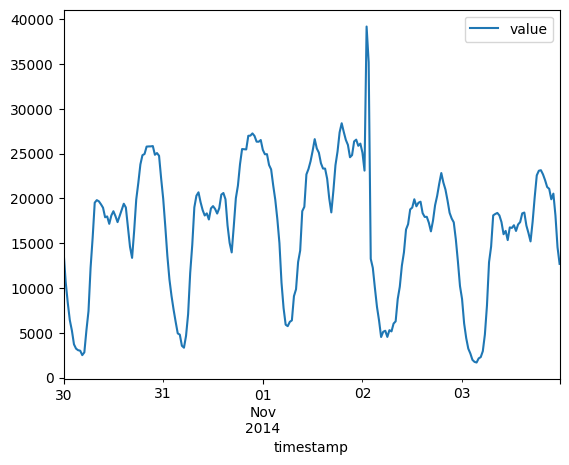

In [48]:
df.loc["2014-10-30":"2014-11-03"].plot()
plt.show()

The occurrence of a New York City Marathon led to a surge.There is a spike as there was a New York City Marathon

### b. Thanksgiving

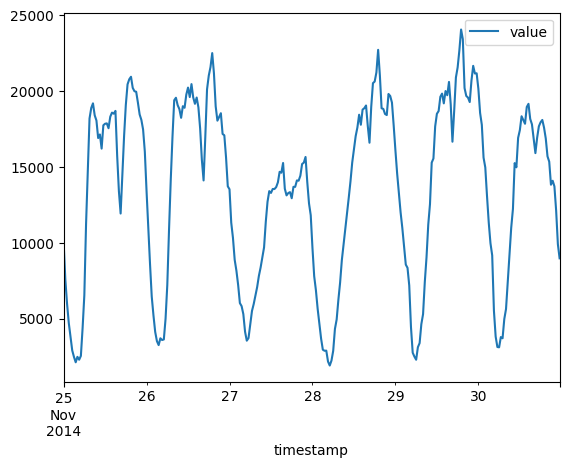

In [49]:
df.loc["2014-11-25":"2014-11-30"].plot()
plt.show()

The number of rides has been reduced due to the occurrence of Thanksgiving on the 27th.

### c. Snow Storm

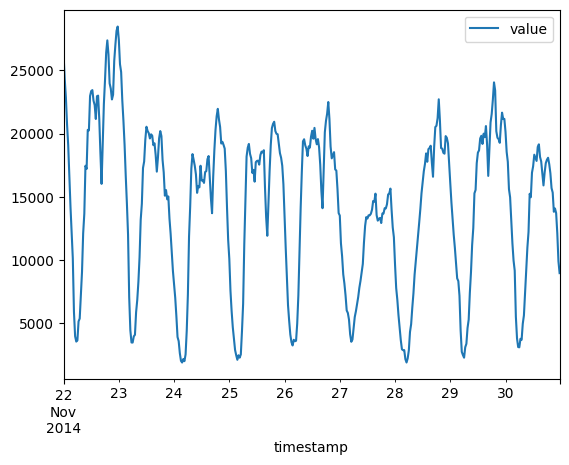

In [50]:
df.loc["2014-11-22":"2014-11-30"].plot()
plt.show()

Due to the presence of snow, there has been a decrease in the number of rides on the 27th.

### d. Chirstmas and New Year

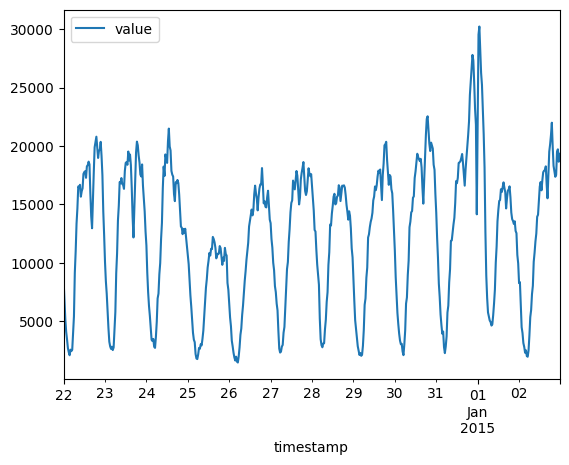

In [51]:
df.loc["2014-12-22":"2015-01-02"].plot()
plt.show()

On Christmas Day, which falls on the 25th of December, there is a decrease in the number of rides, whereas on the 1st of January, there is an increase in the number of rides in New York.

## Visualizing the data

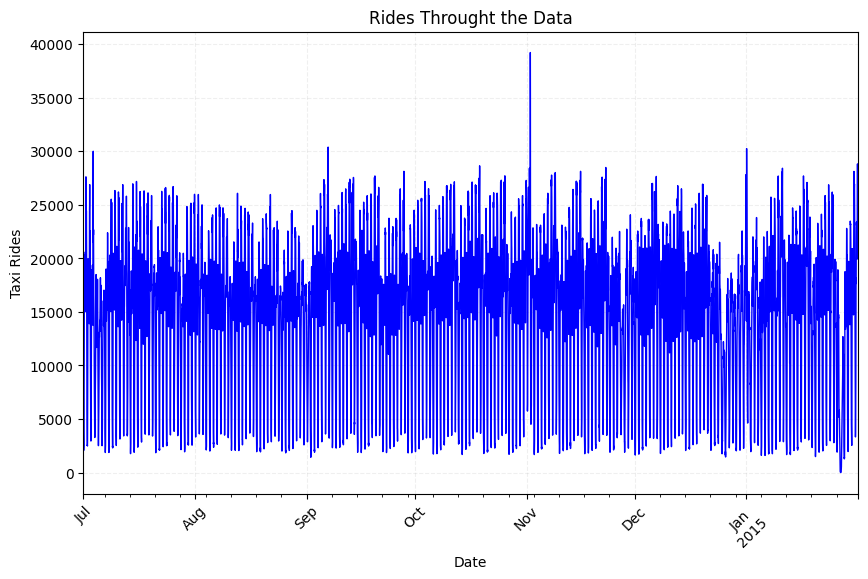

In [52]:
df['value'].plot(figsize=(10, 6), color='blue', linewidth=1)


plt.xlabel('Date')
plt.ylabel('Taxi Rides')
plt.title('Rides Throught the Data')


plt.xticks(rotation=45)

plt.grid(True, linestyle='--', alpha=0.2)

plt.show()


Let's see about the peak we get

In [53]:
df[df['value'] > 35000]

,value
timestamp,
2014-11-02 01:00:00,39197
2014-11-02 01:30:00,35212


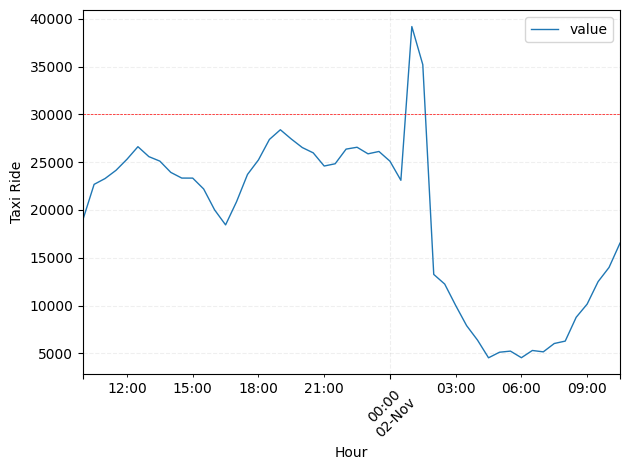

In [54]:
# Taking a closure look at the data

df.loc['2014-11-01 10:00:00':,].head(50).plot(linewidth = 1)

plt.xlabel('Hour')
plt.ylabel('Taxi Ride')
plt.xticks(rotation = 45)
plt.axhline(y = 30000, color = 'red', linestyle = '--', linewidth = 0.5)
plt.tight_layout()
plt.grid(linestyle = '--', alpha = 0.2)
plt.show()

We see something happened on 2 nov 2014 at 1am since there is a high volumne of rides during that hour

**This is the New York Marathon**

In [55]:
# Capping these outlier to 20000
df[df['value'] > 35000] = 20000

Let's add other time attributes to better visualize the data

In [56]:
df['day'] = df.index.day
df['hour'] = df.index.hour
df['weekday'] = df.index.weekday
df['month'] = df.index.month
df.head()

,value,day,hour,weekday,month
timestamp,,,,,
2014-07-01 00:00:00,10844,1,0,1,7
2014-07-01 00:30:00,8127,1,0,1,7
2014-07-01 01:00:00,6210,1,1,1,7
2014-07-01 01:30:00,4656,1,1,1,7
2014-07-01 02:00:00,3820,1,2,1,7


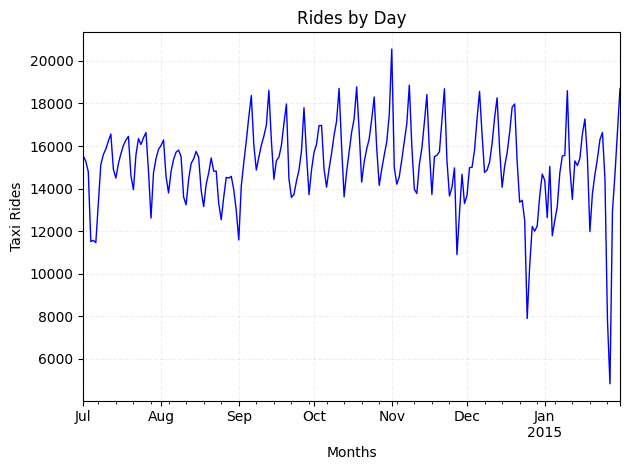

In [57]:
df_day = df['value'].resample('D').mean()
df_day.plot(linewidth = 1, color = 'blue')
plt.xlabel("Months")
plt.ylabel("Taxi Rides")
plt.title("Rides by Day")
plt.tight_layout()
plt.grid(linestyle = '--', alpha = 0.2)
plt.show()

In [58]:
df

,value,day,hour,weekday,month
timestamp,,,,,
2014-07-01 00:00:00,10844,1,0,1,7
2014-07-01 00:30:00,8127,1,0,1,7
2014-07-01 01:00:00,6210,1,1,1,7
2014-07-01 01:30:00,4656,1,1,1,7
2014-07-01 02:00:00,3820,1,2,1,7
...,...,...,...,...,...
2015-01-31 21:30:00,24670,31,21,5,1
2015-01-31 22:00:00,25721,31,22,5,1
2015-01-31 22:30:00,27309,31,22,5,1


In [59]:
import calendar

In [60]:
calendar.month_name[3]

'March'

In [61]:
df["month"] = df["month"].apply(lambda x: calendar.month_name[x])

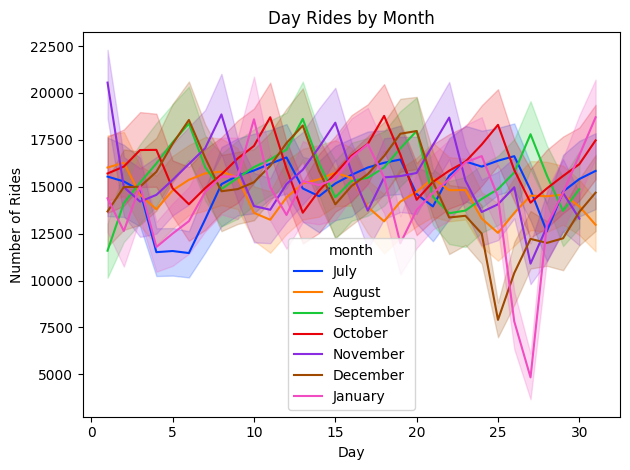

In [62]:
sns.lineplot(
    x="day", 
    y="value",
    data=df,
    palette='bright',
    
    hue= "month")
plt.xlabel("Day")
plt.ylabel("Number of Rides")
plt.title("Day Rides by Month")
plt.tight_layout()
plt.show()


In [63]:
df['weekday'] = df['weekday'].apply(lambda x: calendar.day_name[x])

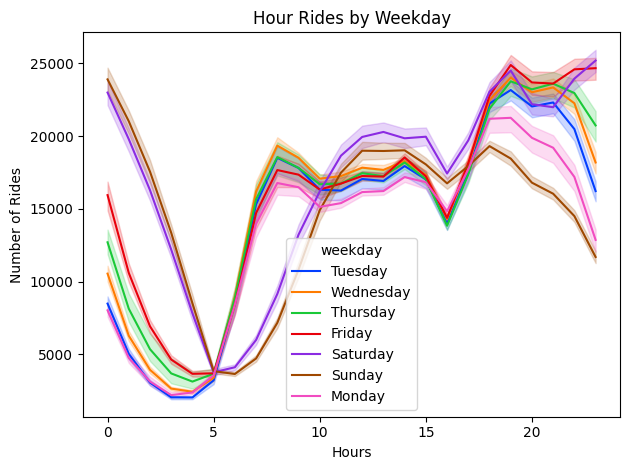

In [64]:

sns.lineplot(
    x="hour", 
    y="value",
    data=df,
    palette='bright',
    hue= "weekday")
plt.xlabel("Hours")
plt.ylabel("Number of Rides")
plt.title("Hour Rides by Weekday")
plt.tight_layout()
plt.show()


In [65]:
df = df[['value', 'day', 'hour']].resample('D').mean()

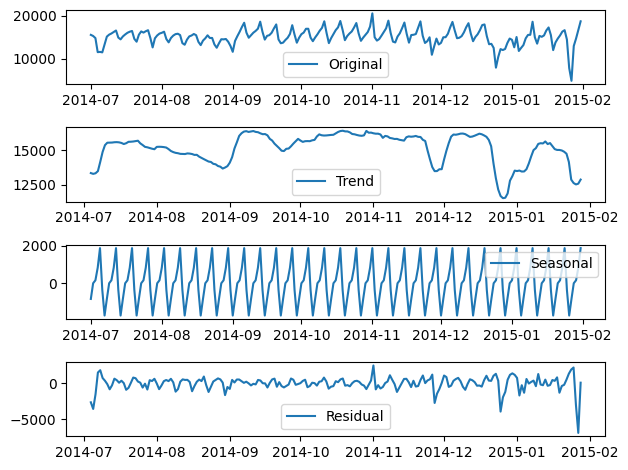

In [67]:
from statsmodels.tsa.seasonal import seasonal_decompose


decomposed = seasonal_decompose(df["value"], model = 'additive')


# Access the individual components
trend = decomposed.trend
seasonal = decomposed.seasonal
residual = decomposed.resid

# Plot the original time series
plt.subplot(411)
plt.plot(df["value"], label='Original')
plt.legend()

# Plot the trend component
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend()

# Plot the seasonal component
plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend()

# Plot the residual component
plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()


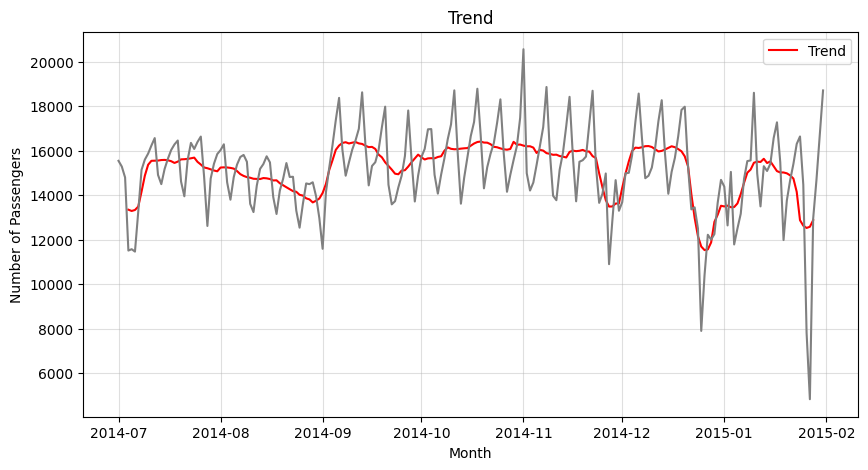

In [68]:
# Plot the seasonally adjusted trend
plt.figure(figsize=(10, 5))
plt.plot(trend, color = 'red', label = 'Trend')
plt.plot(df.index, df['value'], color='gray')
plt.ylabel('Number of Passengers')
plt.xlabel('Month')
plt.title('Trend')
plt.grid(alpha = 0.4)
plt.legend()
plt.show()

## Examining Properties

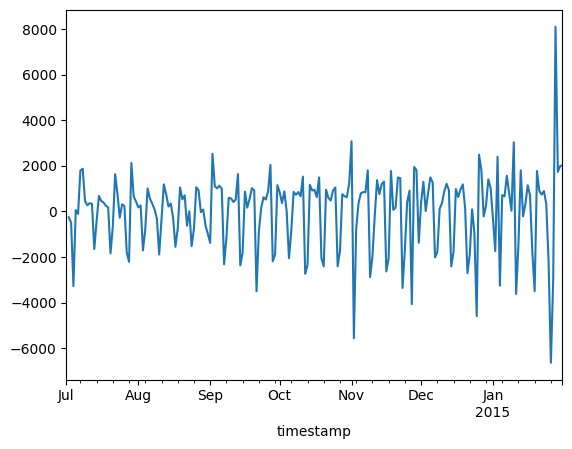

In [69]:
df['value'].diff().plot()
plt.show()

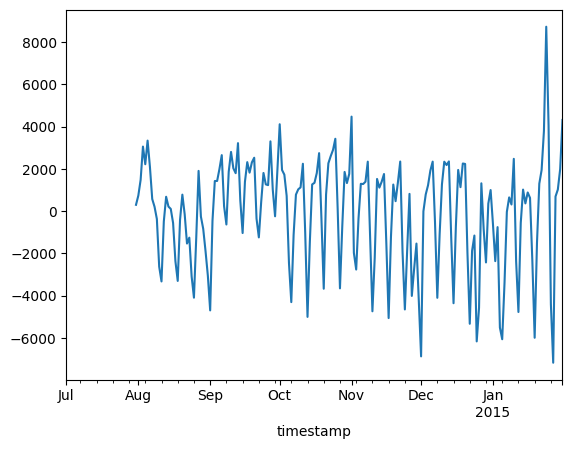

In [70]:
df['value'].diff(30).plot()
plt.show()

In [71]:
from statsmodels.tsa.stattools import adfuller

# Perform Dickey-Fuller test
result = adfuller(df['value'].diff(30)[30:])

# Extract and print the test statistic
print('Test Statistic:', result[0])

# Extract and print the p-value
print('p-value:', result[1])


Test Statistic: -3.2315186934405573
p-value: 0.01823122331214966


Not Stationary

In [72]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


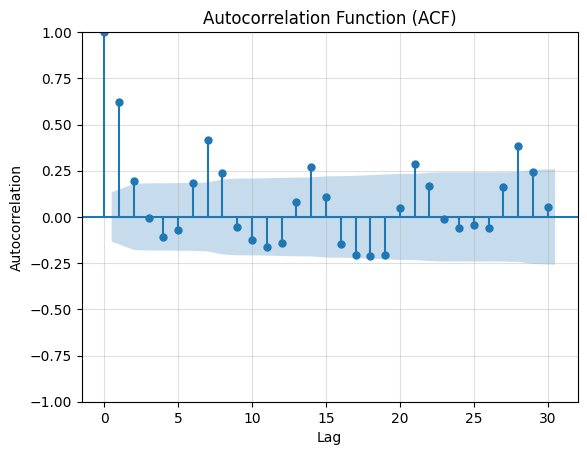

In [73]:
data = df['value']

plot_acf(data, lags=30)

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.grid(alpha = 0.4)
plt.show()


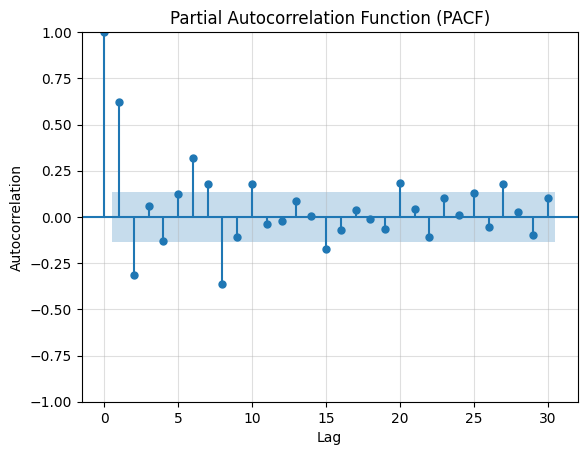

In [74]:
data = df['value']

plot_pacf(data, lags=30)

plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.grid(alpha = 0.4)
plt.show()


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 2014-07-01 to 2015-01-31
Freq: D
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   value   215 non-null    float64
 1   day     215 non-null    float64
 2   hour    215 non-null    float64
dtypes: float64(3)
memory usage: 6.7 KB


## Forecasting

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


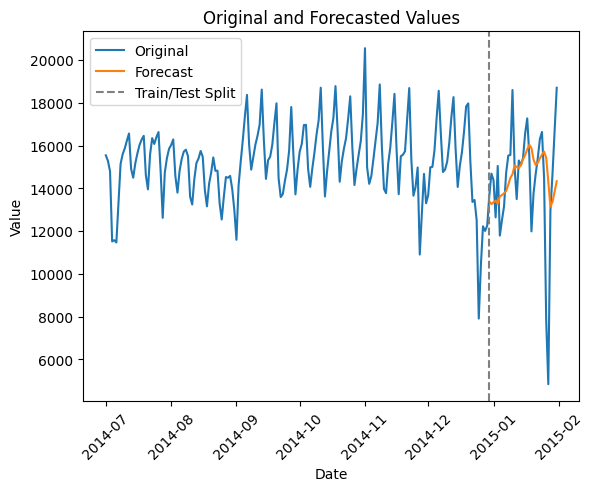

In [85]:
import matplotlib.pyplot as plt

# Plotting the original values
plt.plot(data, label='Original')

# Plotting the forecasted values

predictions = model.predict(X_train)

plt.plot(data.index[-len(predicted_values):], predicted_values, label='Forecast')

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Original and Forecasted Values')
plt.axvline(data.index[-len(predicted_values)], color='grey', linestyle='--', label='Train/Test Split')
plt.legend()
plt.xticks(rotation=45)
plt.show()
